In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas_datareader as dr
from pandas_datareader import data as pdr

import datetime
import yfinance as yf

import warnings

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
from pandas import read_csv, set_option

In [4]:
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

In [6]:
import matplotlib.ticker as ticker
from itertools import cycle

In [7]:
dataset = read_csv("sp500.csv", index_col=0)

In [8]:
dataset.shape

(448, 502)

In [9]:
dataset.describe()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,70.934196,88.078013,307.303839,167.473750,59.630804,252.270603,21.804754,147.501428,14.534888,128.423750,...,165.139486,139.475335,51.671027,29.151071,90.774487,74.549040,93.492455,120.406161,49.230245,94.787232
std,9.015754,13.480891,71.989893,14.635497,13.119012,29.001055,7.425020,21.095302,2.266254,38.573308,...,17.383970,29.251895,6.650626,3.450413,21.081242,4.926937,11.958700,9.199975,4.820335,14.395919
min,56.270000,62.980000,159.309998,133.669998,40.110001,177.699997,9.530000,103.760002,10.060000,71.800003,...,134.839996,92.010002,42.130001,18.920000,62.820000,61.380001,76.300003,97.230003,38.509998,71.510002
25%,62.620001,78.657503,260.557487,157.280006,47.037500,235.377495,15.147500,133.307499,12.847500,94.059998,...,151.705002,114.085001,45.689999,27.139999,71.664999,70.547503,83.507502,114.030001,45.107500,84.557499
50%,70.014999,88.524998,301.940002,162.880005,55.269999,254.684998,21.885000,154.949997,14.830000,113.389999,...,158.809998,132.974998,49.370001,29.075000,85.195000,75.165001,89.930000,120.645000,49.184999,90.090000
75%,78.620003,96.667498,368.095001,178.337502,71.565002,272.989990,28.437500,163.614998,16.355000,158.855000,...,178.064999,164.927498,56.715001,31.455000,109.367500,78.359999,101.462500,125.850002,53.214999,101.970001
max,88.739998,123.209999,449.750000,201.119995,83.389999,311.269989,34.389999,184.720001,18.410000,215.759995,...,199.360001,201.509995,65.820000,36.480000,139.720001,84.410004,119.209999,142.610001,58.540001,128.470001


In [10]:
dataset.isnull().values.any()

True

In [11]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

In [12]:
missing_fractions.head()

CTVA    0.781250
DOW     0.678571
FOX     0.667411
FOXA    0.665179
NOV     0.000000
dtype: float64

In [13]:
drop_list = sorted(list(missing_fractions[missing_fractions>0.3].index))

In [14]:
dataset = dataset.drop(labels=drop_list,axis=1)

In [15]:
dataset.shape[1] == 498

True

In [16]:
dataset = dataset.fillna(method = "ffill")
dataset.head()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.98,106.089996,10.88,203.039993,...,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.55,107.050003,10.87,202.119995,...,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998
2018-01-04,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,12.12,111.000000,10.83,198.539993,...,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,124.739998,50.849998,72.529999
2018-01-05,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,11.88,112.180000,10.87,199.470001,...,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,125.980003,50.869999,73.360001
2018-01-08,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,12.28,111.389999,10.87,200.529999,...,151.410004,162.300003,47.139999,30.260000,74.639999,69.480003,82.980003,126.220001,50.619999,74.239998


In [17]:
returns = dataset.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ["Returns"]
returns["Volatility"] = dataset.pct_change().std()*np.sqrt(252)
data = returns

In [18]:
data = np.asarray([np.asarray(returns["Returns"]),np.asarray(returns["Volatility"])]).T

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler().fit(data)

In [21]:
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = returns.columns, index = returns.index)
rescaledDataset

,Returns,Volatility
ABT,0.794067,-0.702741
ABBV,-0.927603,0.794867
ABMD,-0.054463,2.796251
ACN,0.405155,-0.802003
ATVI,-0.409875,1.495648
...,...,...
XYL,0.277667,-0.351776
YUM,0.856756,-1.308305
ZBH,0.144690,-0.519879
ZION,-0.568698,-0.177625


In [22]:
X = rescaledDataset
X.head()

,Returns,Volatility
ABT,0.794067,-0.702741
ABBV,-0.927603,0.794867
ABMD,-0.054463,2.796251
ACN,0.405155,-0.802003
ATVI,-0.409875,1.495648


  File "E:\software\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "E:\software\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\software\anaconda3\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "E:\software\anaconda3\Lib\subprocess.py", line 1509, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


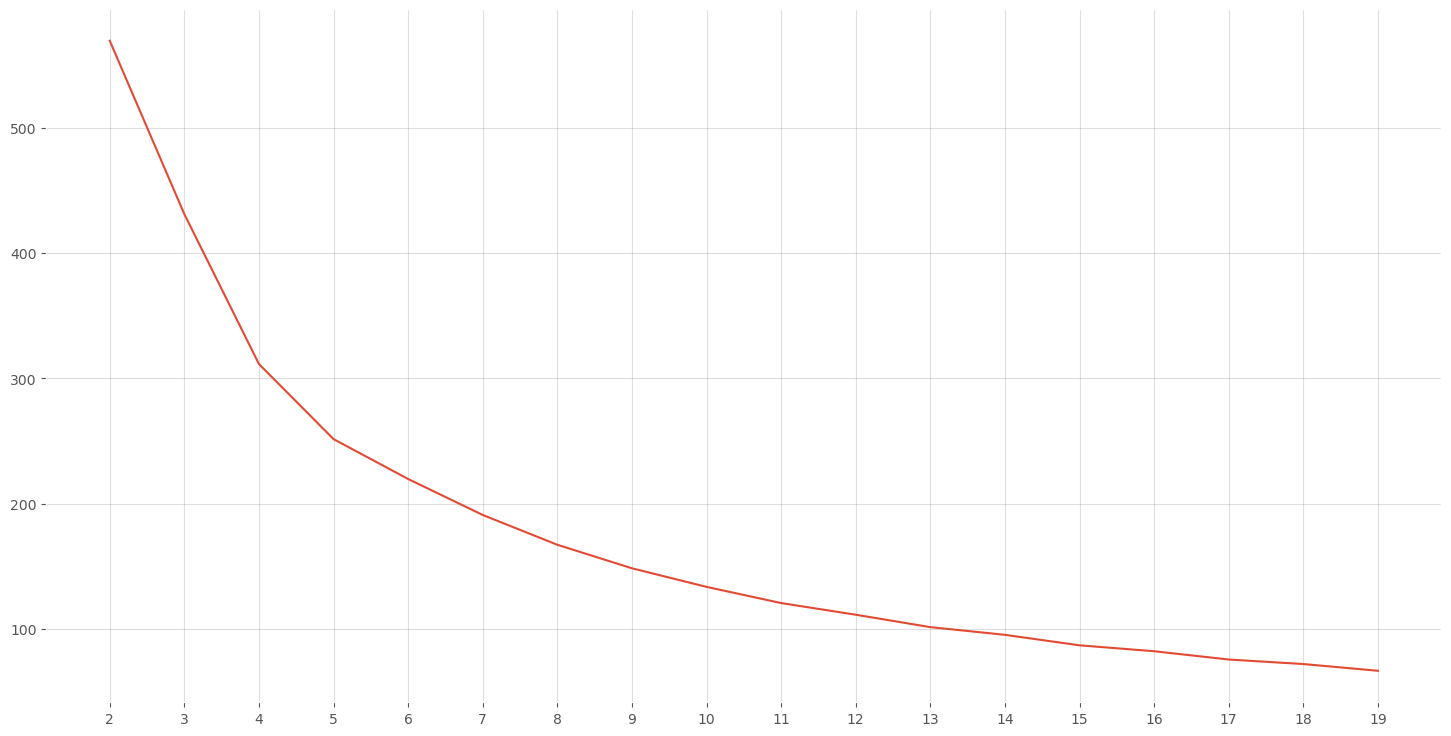

In [23]:
distortions = []

max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=[18,9])
plt.plot(range(2,max_loop), distortions)
plt.xticks([i for i in range(2, max_loop)])
plt.grid(True)

In [24]:
from sklearn import metrics

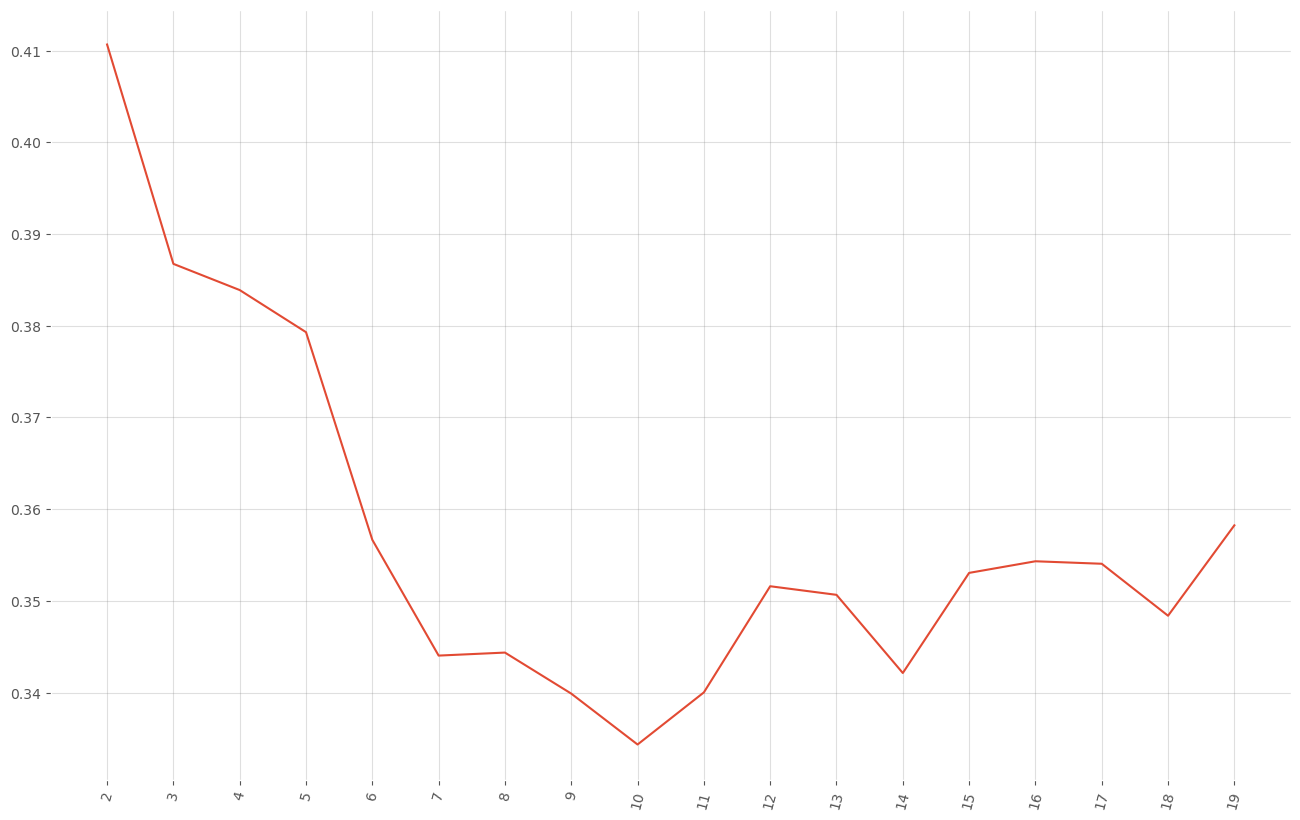

In [25]:
silhouette_score = []

for k in range(2, max_loop):
        kmeans = KMeans(n_clusters = k,  
                        random_state = 10, 
                        n_init = 10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10)
                               )

fig = plt.figure(figsize=(16, 10)
                )

plt.plot(range(2, max_loop), silhouette_score)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

In [26]:
nclust = 6

In [27]:
import numpy as np

In [28]:
import threadpoolctl 

In [29]:
import sklearn

print(sklearn.show_versions()
     )


System:
    python: 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
executable: E:\software\anaconda3\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.3.2
          pip: 23.1.2
   setuptools: 67.8.0
        numpy: 1.24.3
        scipy: 1.10.1
       Cython: None
       pandas: 2.1.0
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
         prefix: mkl_rt
       filepath: E:\software\anaconda3\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel
    num_threads: 4

       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: E:\software\anaconda3\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None
    num_threads: 8
None


In [30]:
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=6)

In [31]:
target_labels = k_means.predict(X)

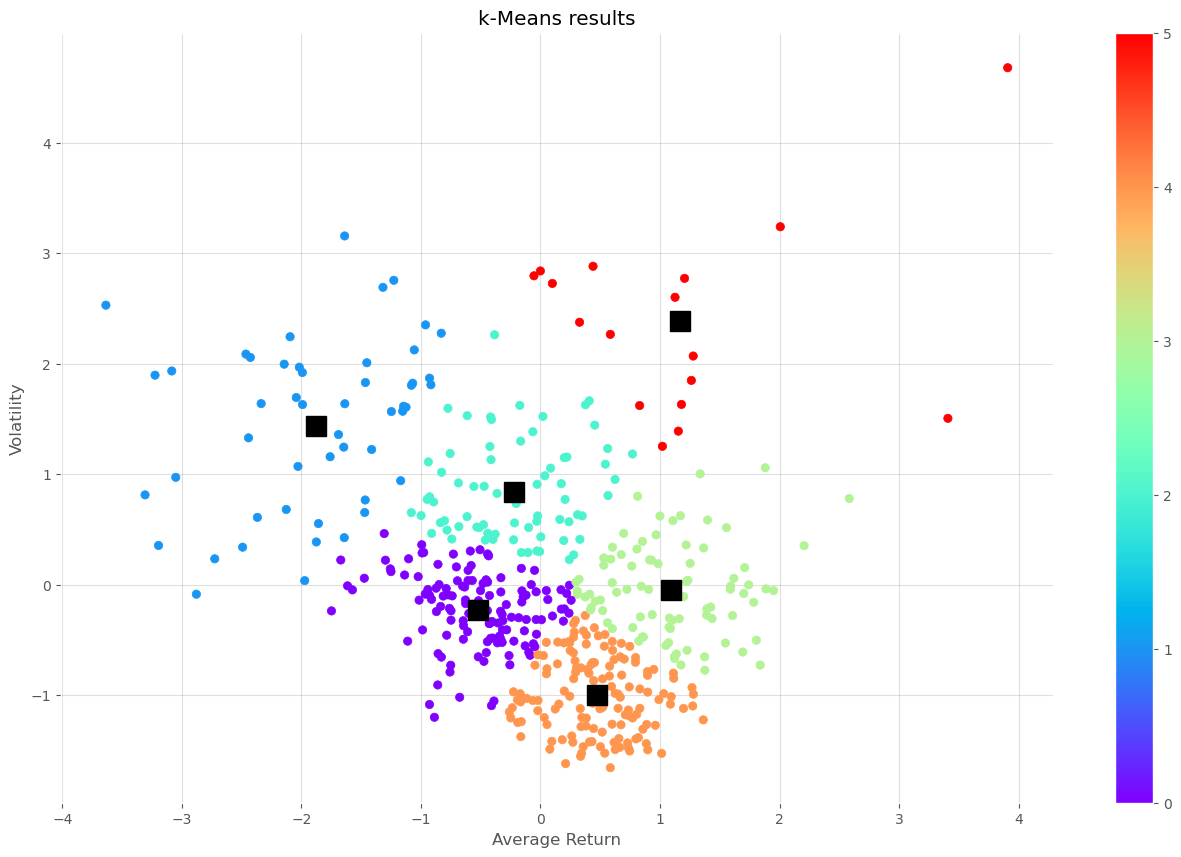

In [32]:
centroids = k_means.cluster_centers_

fig = plt.figure(figsize=(16,10))

ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = k_means.labels_, cmap = "rainbow", label = X.index)

ax.set_title("k-Means results")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

plt.plot(centroids[:,0], centroids[:,1], 'sg', markersize=15, color = "black")
plt.show()

In [33]:
clustered_series = pd.Series(index = X.index, data = k_means.labels_.flatten())

In [34]:
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten()
                                )

clustered_series = clustered_series[clustered_series != -1]

In [35]:
clustered_series.value_counts()

4    140
0    132
3     87
2     72
1     50
5     17
Name: count, dtype: int64

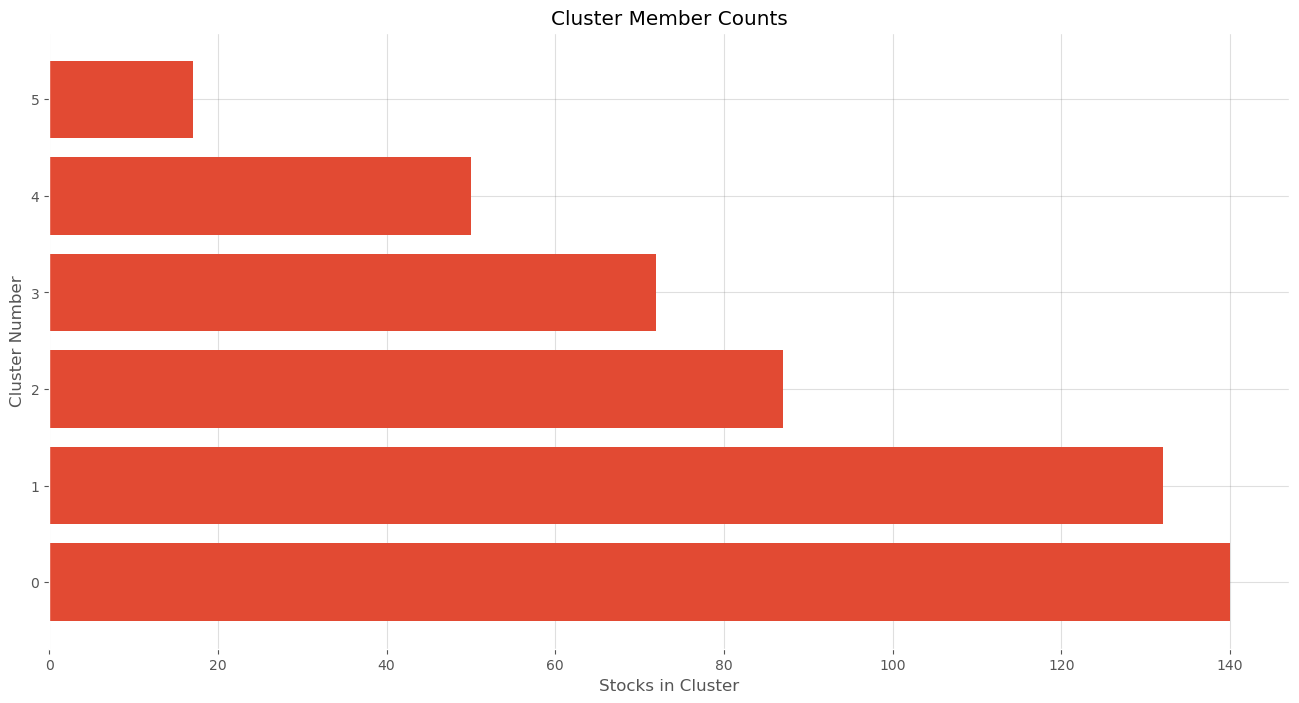

In [36]:
plt.figure(figsize=(16,8)
          )

plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())

plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')

plt.show()

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [38]:
Z = linkage(X, 
            method = "ward")
Z

array([[3.300e+01, 3.140e+02, 3.626e-03, 2.000e+00],
       [1.370e+02, 3.460e+02, 6.723e-03, 2.000e+00],
       [8.100e+01, 2.840e+02, 1.075e-02, 2.000e+00],
       ...,
       [9.870e+02, 9.900e+02, 1.603e+01, 2.330e+02],
       [9.890e+02, 9.920e+02, 1.846e+01, 2.890e+02],
       [9.910e+02, 9.930e+02, 2.622e+01, 4.980e+02]])

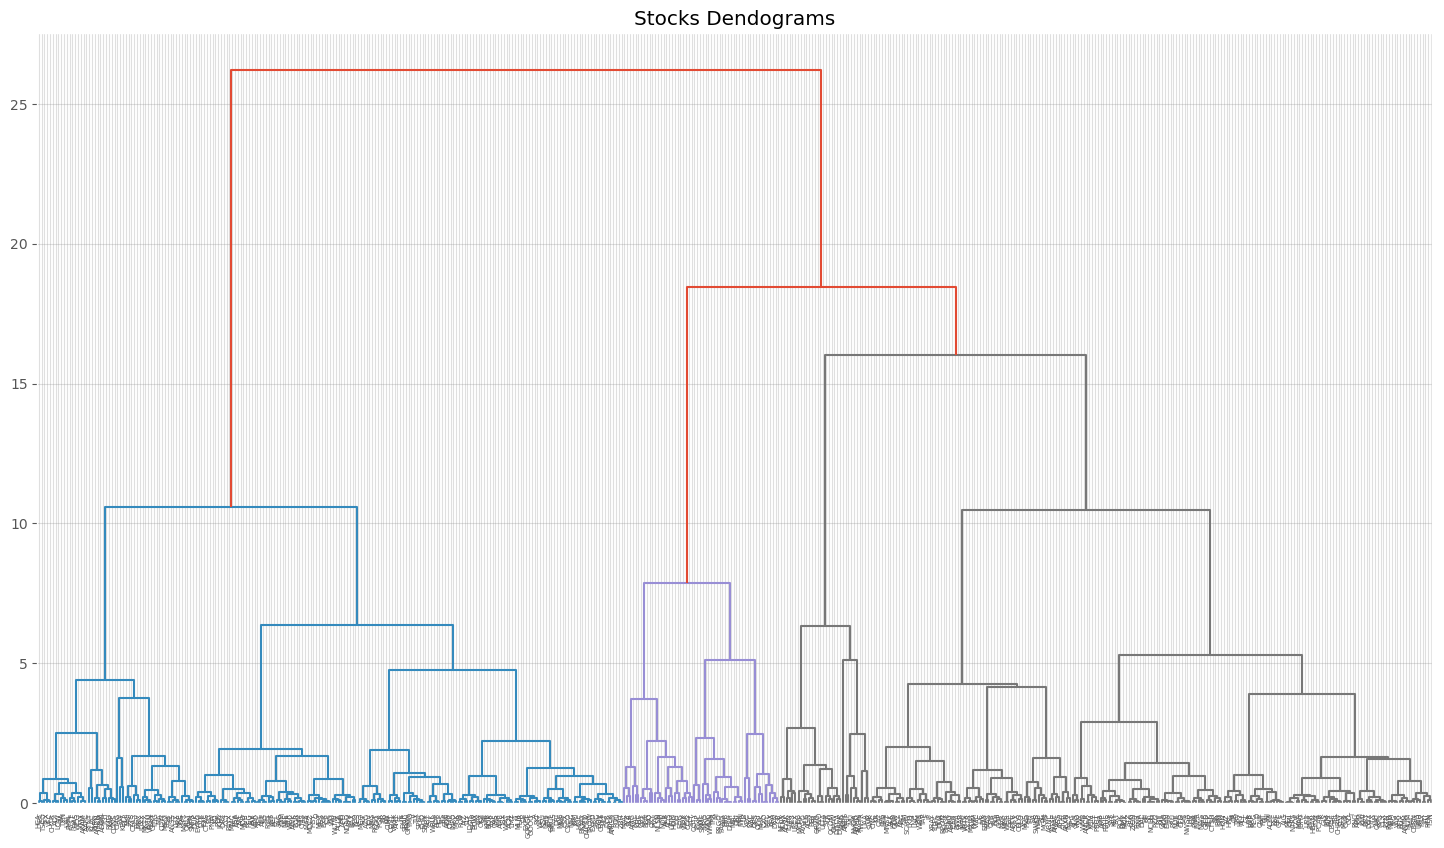

In [39]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

In [40]:
distance_threshold = 13

clusters = fcluster(Z, distance_threshold, criterion="distance")

chosen_clusters = pd.DataFrame(data=clusters, columns=["cluster"])

chosen_clusters["cluster"].unique()

array([1, 4, 3, 2])

In [41]:
nclust = 4

hc = AgglomerativeClustering(n_clusters = nclust, 
                             affinity = "euclidean", 
                             linkage = "ward")

clust_labels1 = hc.fit_predict(X)

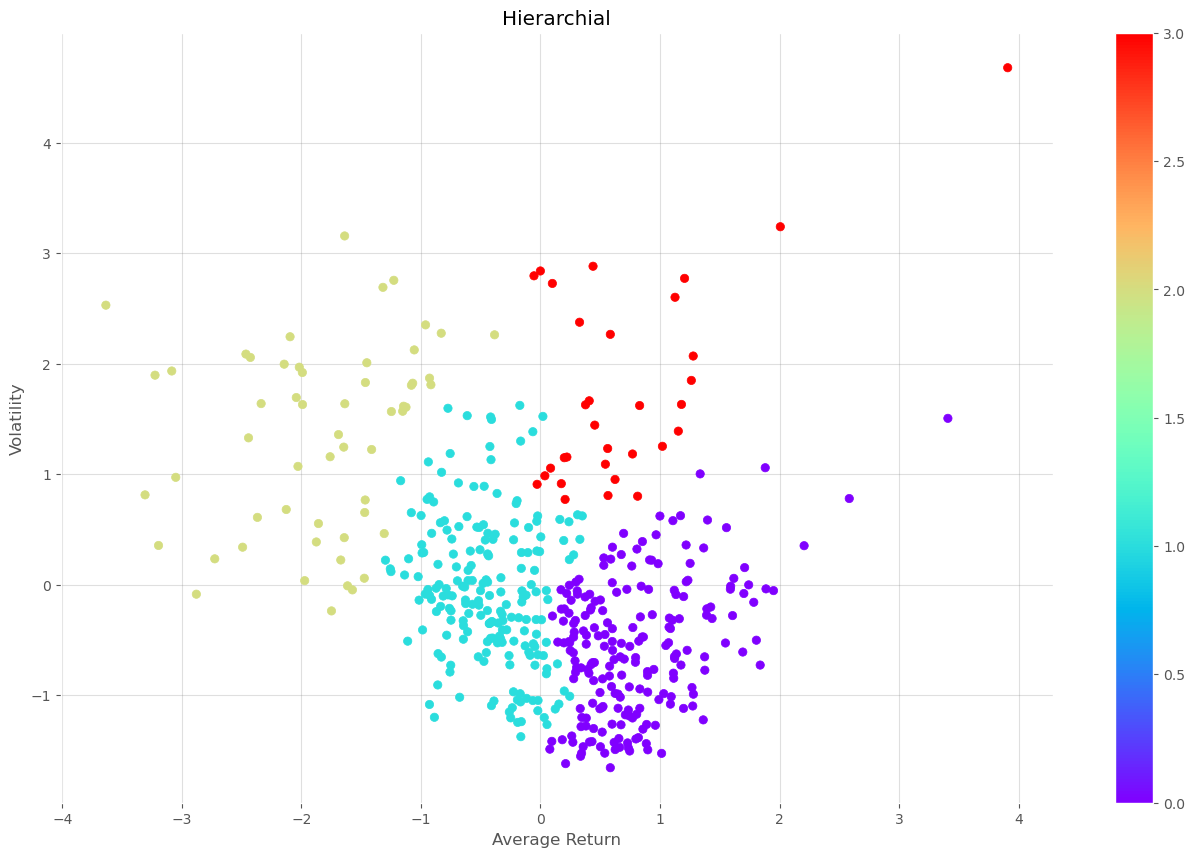

In [42]:
fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = clust_labels1, cmap = "rainbow")

ax.set_title("Hierarchial")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

In [43]:
ap = AffinityPropagation()

ap.fit(X)

clust_labels2 = ap.predict(X)

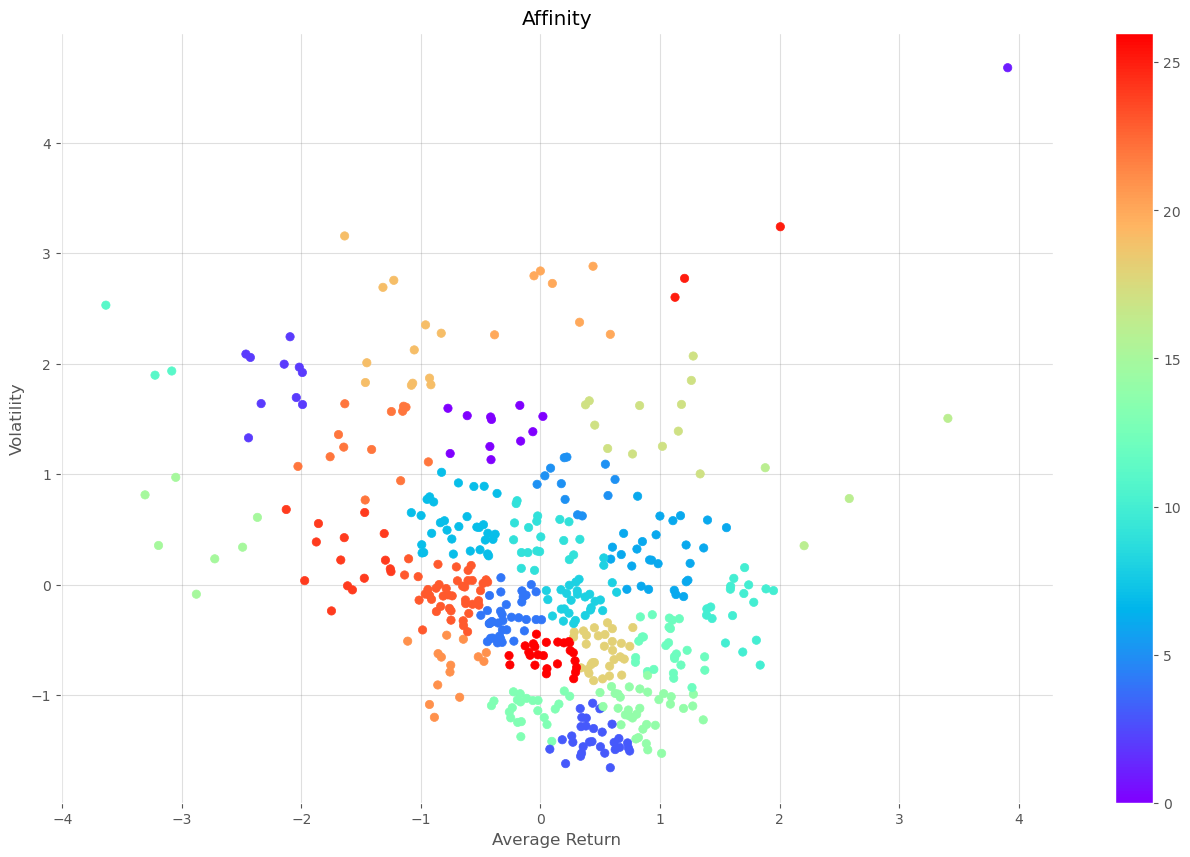

In [44]:
fig = plt.figure(figsize=(16,10)
                )
ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = clust_labels2, cmap = "rainbow")

ax.set_title("Affinity")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")
             
plt.colorbar(scatter)

In [45]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

Estimated number of clusters: 27


<Figure size 640x480 with 0 Axes>

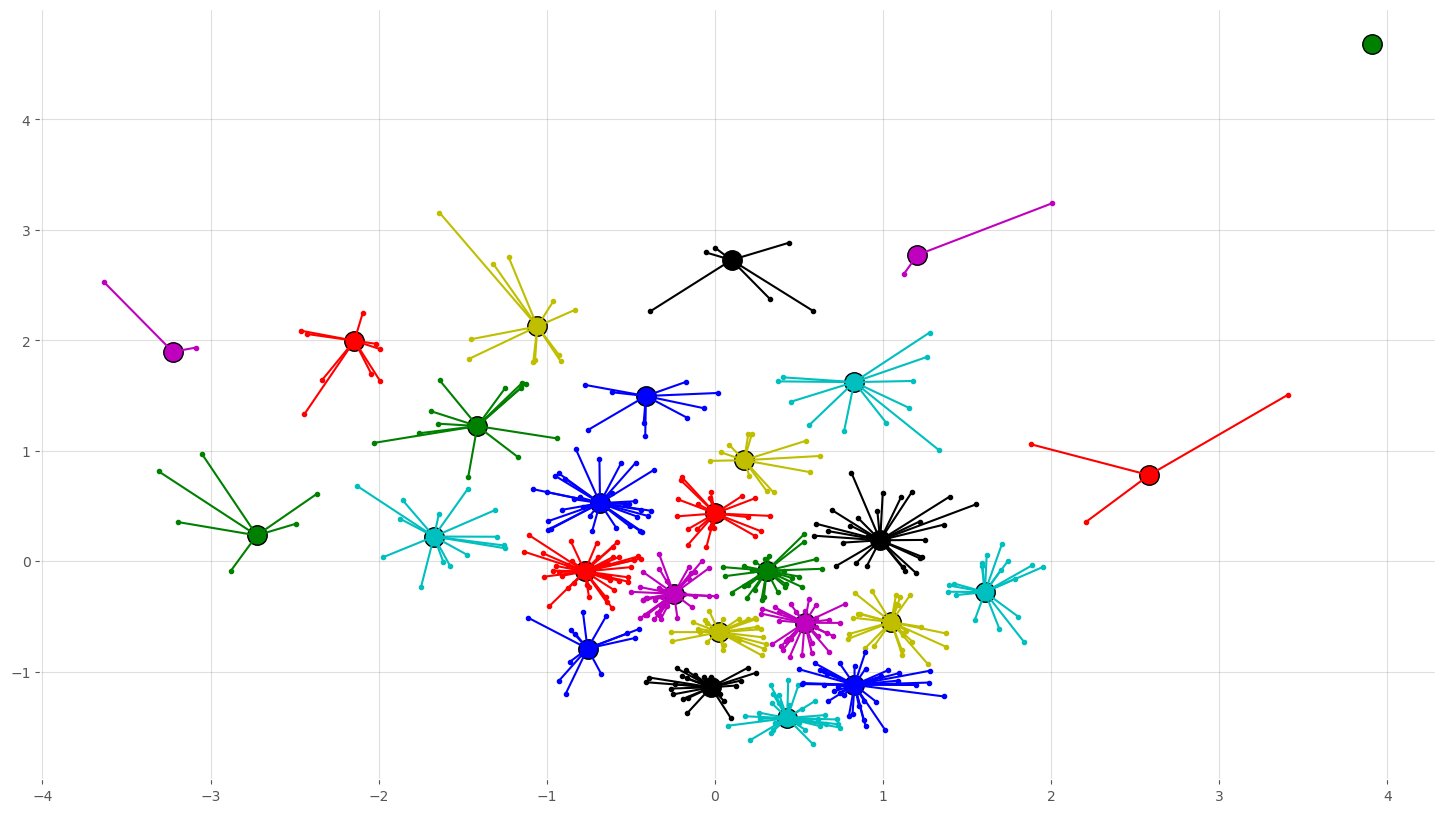

In [46]:
no_clusters = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % no_clusters)

# Plot exemplars

X_temp=np.asarray(X)
plt.close("all")
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(18,10)
                )
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

for k, col in zip(range(no_clusters), colors):
    
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + ".")
    
    plt.plot(cluster_center[0], cluster_center[1], 
             "o", 
             markerfacecolor = col, 
             markeredgecolor = "k", 
             markersize = 14)
    
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [47]:
# show number of stocks in each cluster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten()
                               )

# clustered stock with its cluster label
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

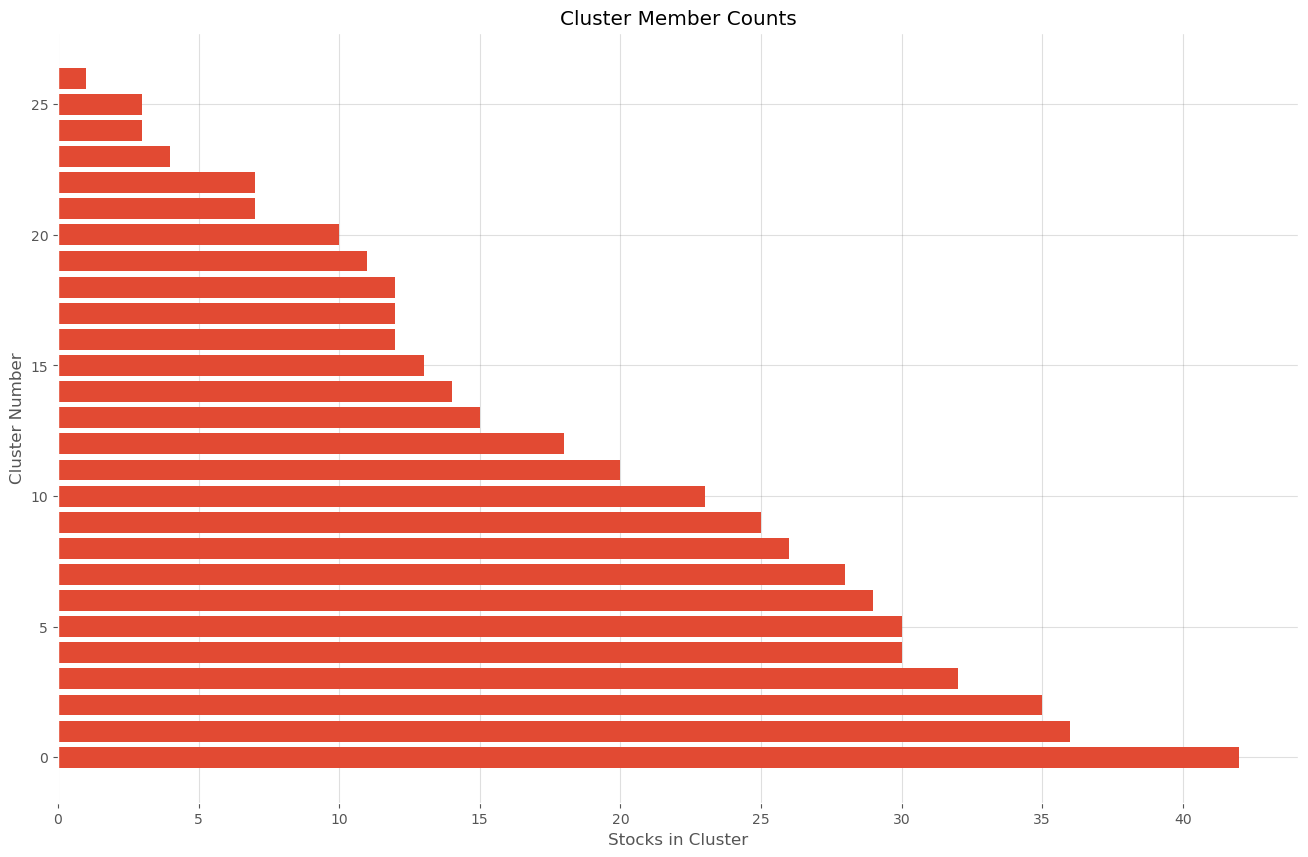

In [48]:
plt.figure(figsize=(16,10)
          )

plt.barh(
    range(len(clustered_series_ap.value_counts()
             )
         ), # cluster labels, y axis
    clustered_series_ap.value_counts()
)

plt.title("Cluster Member Counts")
plt.xlabel("Stocks in Cluster")
plt.ylabel("Cluster Number")

plt.show()

In [49]:
from sklearn import metrics

In [50]:
print("km", metrics.silhouette_score(X, k_means.labels_, 
                                     metric='euclidean')
     )

print("hc", metrics.silhouette_score(X, hc.fit_predict(X), 
                                     metric='euclidean')
     )

print("ap", metrics.silhouette_score(X, ap.labels_, 
                                     metric='euclidean')
     )

km 0.35577188474210425
hc 0.3432149515640864
ap 0.3450647315156526


In [51]:
# All stock with its cluster label (including -1)
clustered_series = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                            )

# Clustered stock with its cluster label

clustered_series_all = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                                )

clustered_series = clustered_series[clustered_series != -1]

In [52]:
counts = clustered_series_ap.value_counts()
cluster_vis_list = list(counts[(counts<25)&(counts>1)].index)[::-1]
cluster_vis_list

[25, 11, 16, 20, 15, 2, 0, 19, 17, 5, 22, 21, 24, 10, 9, 13]

In [53]:
CLUSTER_SIZE_LIMIT = 9999

counts = clustered_series.value_counts()

ticker_count_reduced = counts[(counts>1) & (counts <= CLUSTER_SIZE_LIMIT)]

print ("Clusters formed: %d" % len(ticker_count_reduced)
      )
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)
                                 ).sum()
      )

Clusters formed: 26
Pairs to evaluate: 12166


In [54]:
# plot a handful of the smallest clusters
plt.figure(figsize=(16,10)
          )
cluster_vis_list[0:min(len(cluster_vis_list), 4)]

[25, 11, 16, 20]

<Figure size 1600x1000 with 0 Axes>

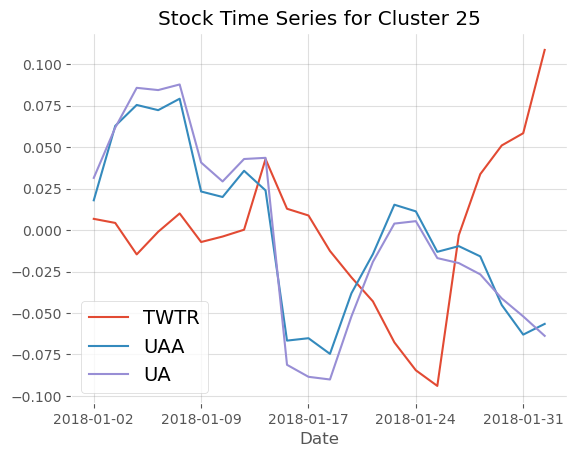

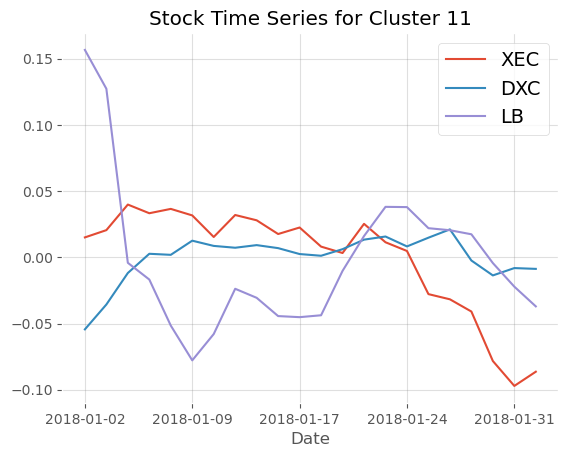

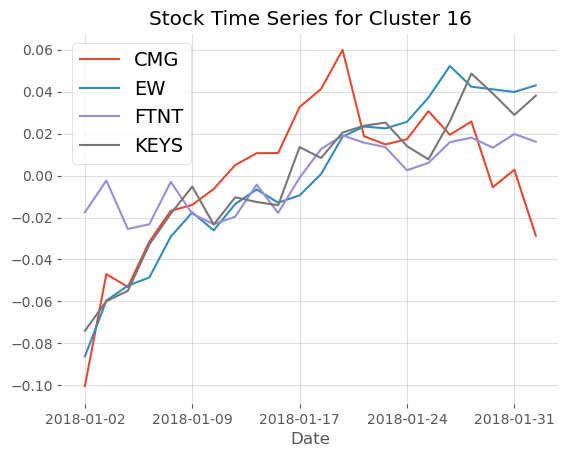

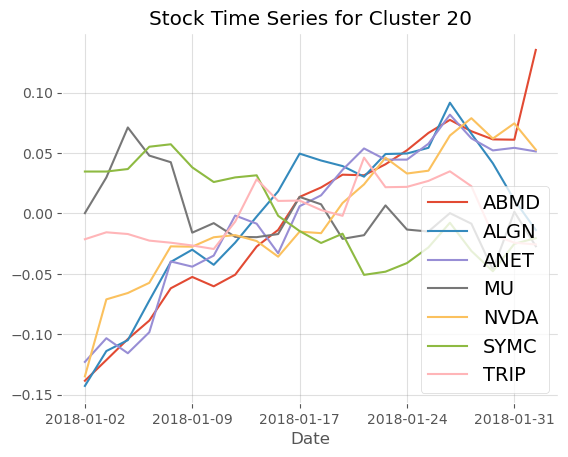

In [55]:
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 4)]:
    
    tickers = list(clustered_series[clustered_series == clust].index)
    
    means = np.log(dataset.loc[:"2018-02-01", tickers].mean())
    
    data = np.log(dataset.loc[:"2018-02-01", tickers]).sub(means)
    
    data.plot(title='Stock Time Series for Cluster %d' % clust)
    
plt.show()

In [75]:
from statsmodels.tsa.stattools import coint

In [77]:
def find_cointegrated_pairs(data, significance=0.05):
    # Get the number of columns in the data (i.e., number of securities)
    n = data.shape[1]
    
    # Initialize a matrix filled with zeros to store cointegration scores
    score_matrix = np.zeros((n, n))
    
    # Initialize a matrix filled with ones to store p-values of the cointegration tests
    pvalue_matrix = np.ones((n, n))
    
    # Extract the column names (security names) from the data
    keys = data.keys()
    
    # List to store pairs of securities that are cointegrated
    pairs = []
    
    # Double loop to go through each combination of securities
    for i in range(n):  
        for j in range(i+1, n):
            
            # Extract the time series data for the two securities in consideration
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            
            # Perform the cointegration test between the two securities
            result = coint(S1, S2)
            
            # Extract the score (test statistic) and p-value from the result
            score = result[0]
            pvalue = result[1]
            
            # Store the score and p-value in their respective matrices
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            
            # If the p-value is less than the significance level, 
            # then the pair is considered cointegrated and added to the pairs list
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))

    # Return the score matrix, p-value matrix, and the list of cointegrated pairs
    return score_matrix, pvalue_matrix, pairs

In [86]:
cluster_dict = {}

for i, which_clust in enumerate(ticker_count_reduced.index):
    
    tickers = clustered_series[clustered_series == which_clust].index   
    
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(dataset[tickers]
                                   )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]["score_matrix"] = score_matrix
    cluster_dict[which_clust]["pvalue_matrix"] = pvalue_matrix
    cluster_dict[which_clust]["pairs"] = pairs

In [91]:
cluster_dict.keys()

dict_keys([23, 4, 14, 7, 18, 3, 8, 6, 12, 26, 13, 9, 10, 24, 21, 22, 5, 17, 19, 0, 2, 15, 20, 16, 11, 25])

In [94]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]["pairs"])

In [96]:
print ("Number of pairs found : %d" % len(pairs)
      )
print ("In those pairs, there are %d unique tickers." % len(np.unique(pairs)
                                                           )
      )

Number of pairs found : 603
In those pairs, there are 362 unique tickers.
